## 08. 카드이용금액
- '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [53]:
import pandas as pd

# 1. 사용할 컬럼 지정
usecols = [
    'Segment',
    '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족'
]

# 2. CSV 불러오기
df = pd.read_csv("df_member.csv", usecols=usecols)

# 3. 세그먼트별 평균 계산
segment_mean = df.groupby("Segment").mean().round(2)

# 4. 평균값 표 출력
from IPython.display import display
display(segment_mean)

,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족
Segment,,,,,
A,98294.21,97090.13,4144.60,1204.04,0.0
B,91296.15,88537.07,3157.32,2758.88,0.0
C,60613.19,54590.52,1736.52,6022.55,0.0
D,38603.93,34187.23,737.73,4416.58,0.0
E,10054.58,9196.65,99.03,857.89,0.0


<Figure size 1200x600 with 0 Axes>

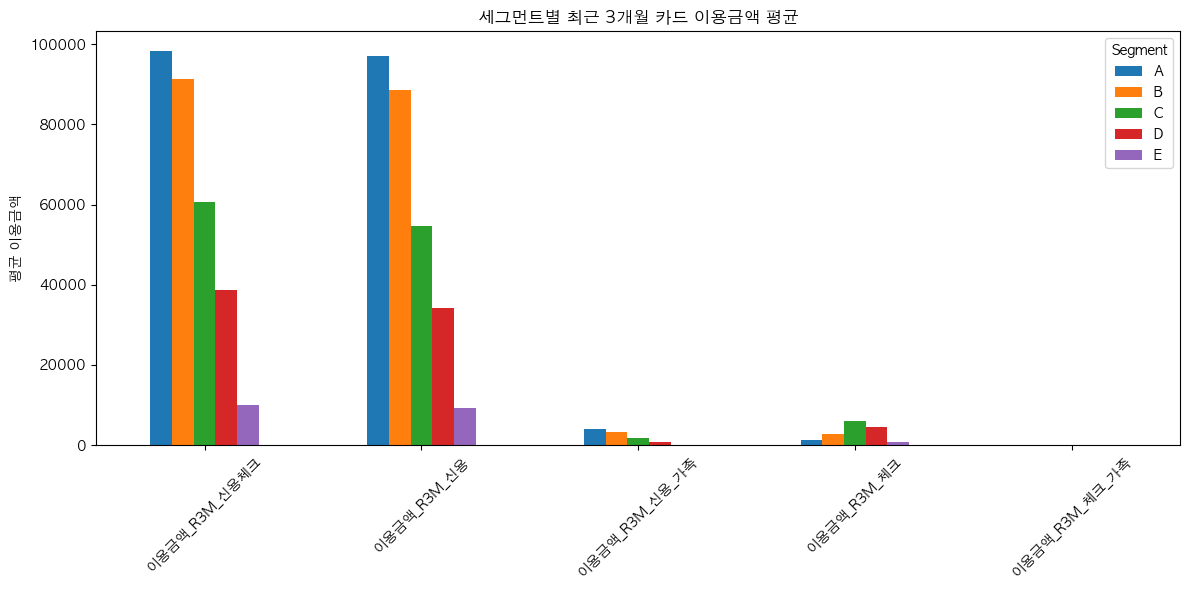

In [55]:
# 전치 후 막대그래프 (항목별로 Segment 비교)
plt.figure(figsize=(12, 6))
segment_mean.T.plot(kind="bar", figsize=(12, 6))
plt.title("세그먼트별 최근 3개월 카드 이용금액 평균")
plt.ylabel("평균 이용금액")
plt.xticks(rotation=45)
plt.legend(title="Segment")
plt.tight_layout()
plt.show()

- 당연히 A, B 등급의 이용금액이 높음
- 평균화/표준화를 하거나 체크카드 대비 신용카드 얼마나 쓰는지, 가족 대비 개인한테 얼마나 쓰는지 등과 같은 기준으로 더 보기

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 표준화 (평균=0, 표준편차=1)
scaler_standard = StandardScaler()
segment_mean_standard = pd.DataFrame(scaler_standard.fit_transform(segment_mean),
                                     columns=segment_mean.columns,
                                     index=segment_mean.index)

# 원본 평균값 테이블 출력
print("📊 Segment별 원본 평균")
display(segment_mean)

# 표준화된 데이터 출력
print("\n📊 Segment별 표준화(Z-score)")
display(segment_mean_standard)

📊 Segment별 원본 평균


,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족
Segment,,,,,
A,98294.21,97090.13,4144.60,1204.04,0.0
B,91296.15,88537.07,3157.32,2758.88,0.0
C,60613.19,54590.52,1736.52,6022.55,0.0
D,38603.93,34187.23,737.73,4416.58,0.0
E,10054.58,9196.65,99.03,857.89,0.0



📊 Segment별 표준화(Z-score)


,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족
Segment,,,,,
A,1.172360,1.226961,1.448821,-0.947946,0.0
B,0.959383,0.967007,0.789521,-0.150356,0.0
C,0.025588,-0.064731,-0.159282,1.523816,0.0
D,-0.644235,-0.684849,-0.826269,0.699998,0.0
E,-1.513097,-1.444388,-1.252790,-1.125512,0.0


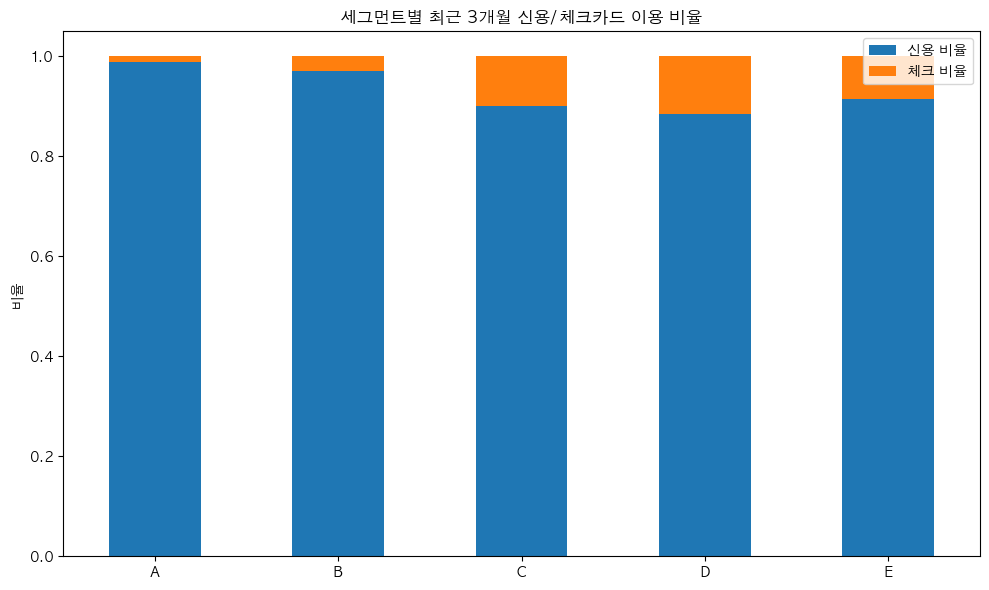

In [66]:
# 세그먼트별 평균값
segment_mean = pd.DataFrame({
    "이용금액_R3M_신용체크": [98294.21, 91296.15, 60613.19, 38603.93, 10054.58],
    "이용금액_R3M_신용": [97090.13, 88537.07, 54590.52, 34187.23, 9196.65],
    "이용금액_R3M_체크": [1204.04, 2758.88, 6022.55, 4416.58, 857.89]
}, index=["A", "B", "C", "D", "E"])

# 신용 비율 계산
segment_mean["신용 비율"] = segment_mean["이용금액_R3M_신용"] / (
    segment_mean["이용금액_R3M_신용"] + segment_mean["이용금액_R3M_체크"])

# 체크 비율 = 1 - 신용 비율
segment_mean["체크 비율"] = 1 - segment_mean["신용 비율"]

# 시각화
segment_mean[["신용 비율", "체크 비율"]].plot(kind="bar", figsize=(10, 6), stacked=True)
plt.title("세그먼트별 최근 3개월 신용/체크카드 이용 비율")
plt.ylabel("비율")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()